In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("songs_normalize.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [5]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(59)

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [31]:
def outliers(x):
  
    for i in x:
        sns.boxplot(x = df[i])
        plt.title(i)
        plt.show()

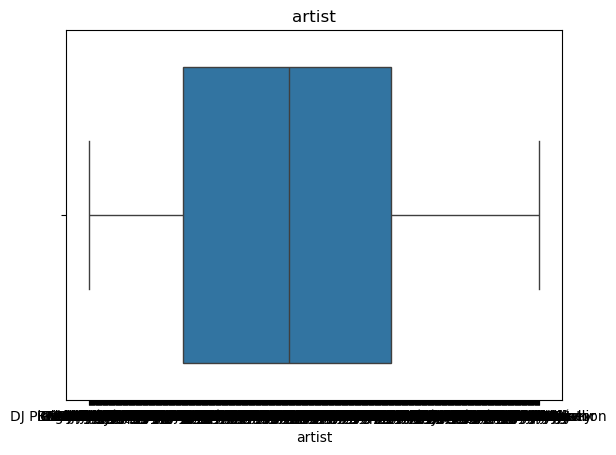

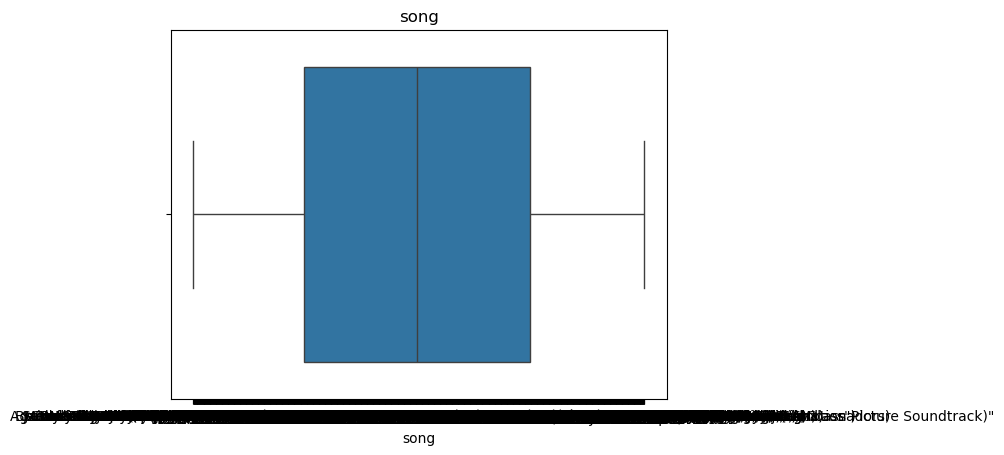

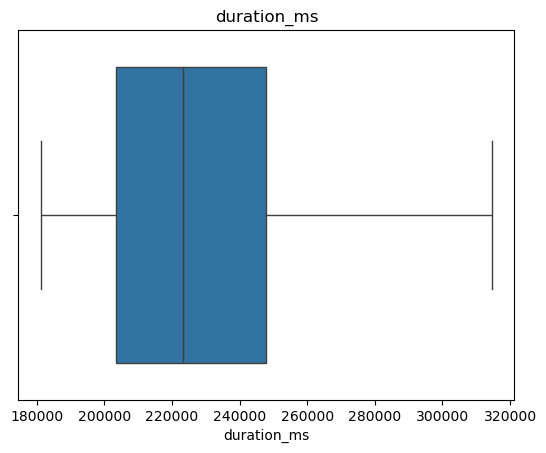

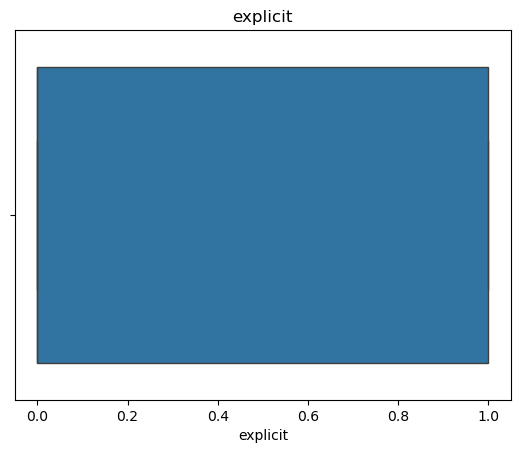

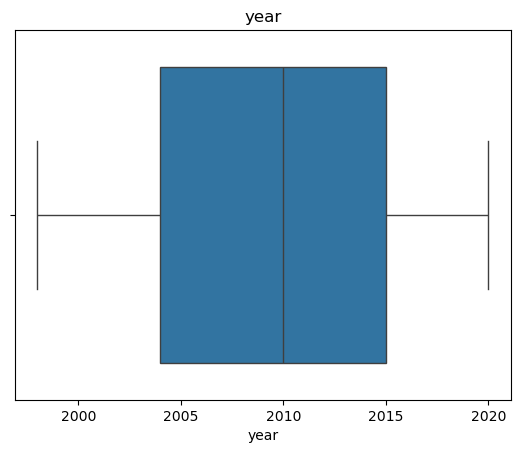

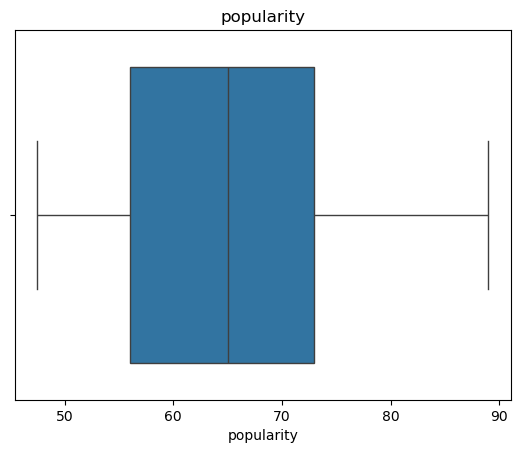

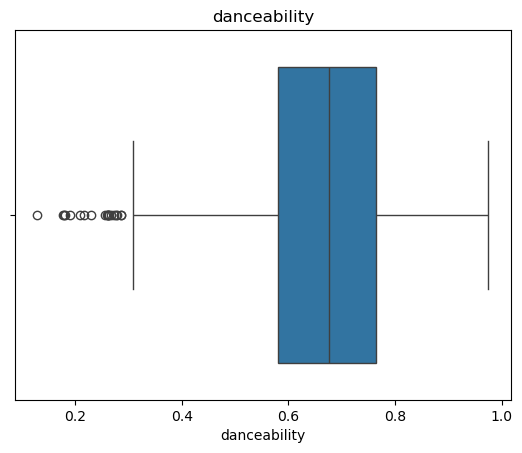

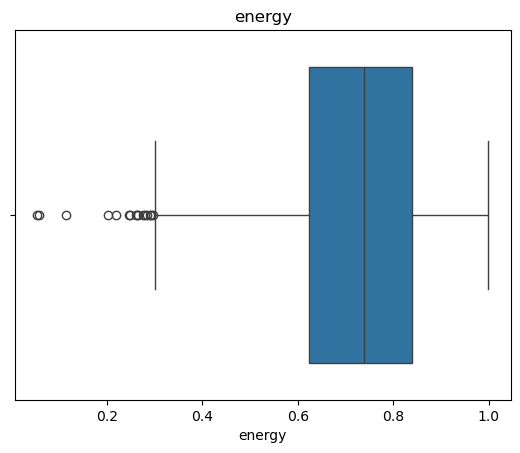

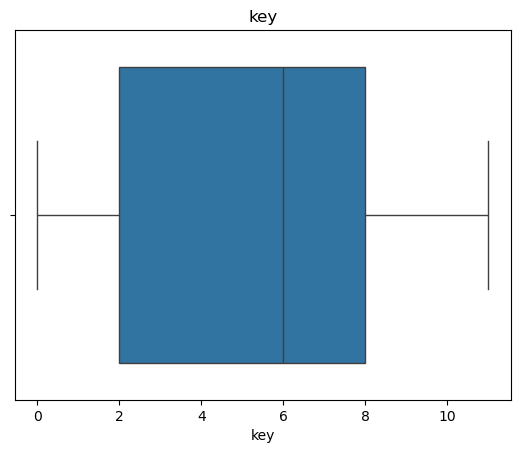

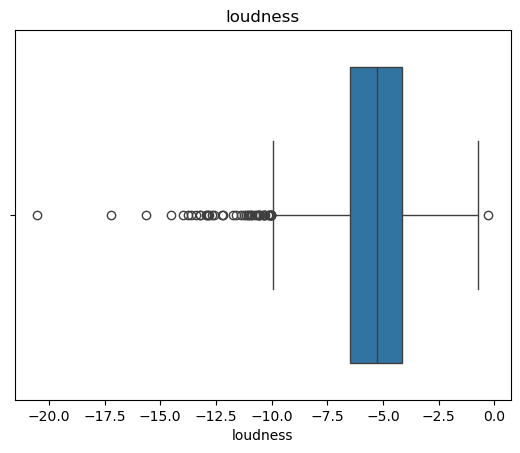

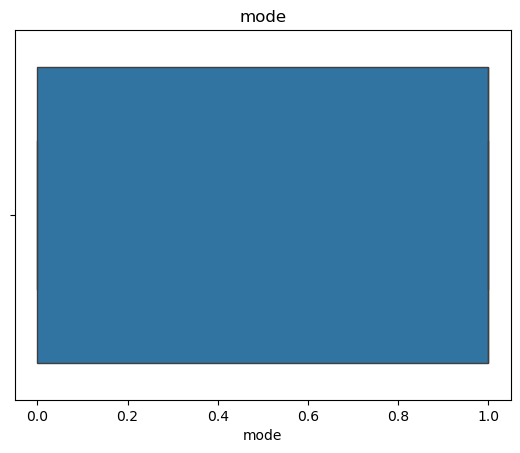

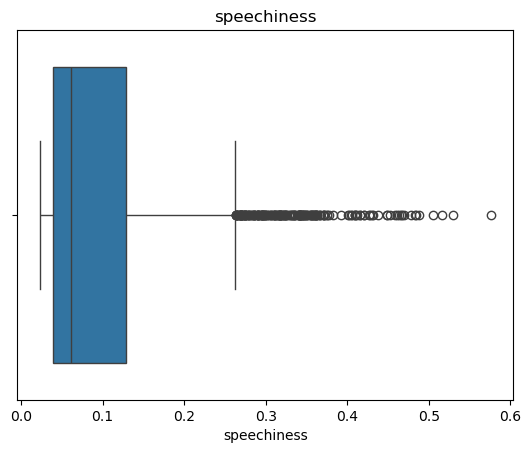

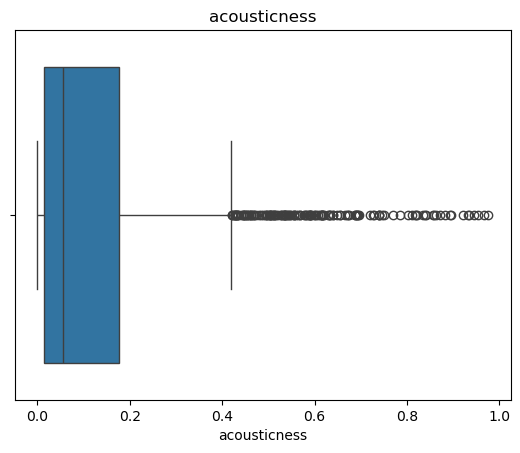

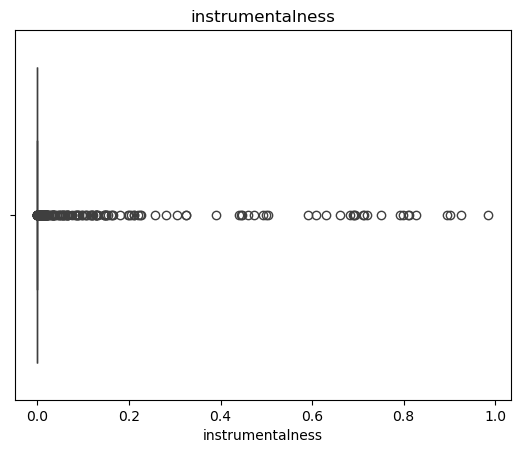

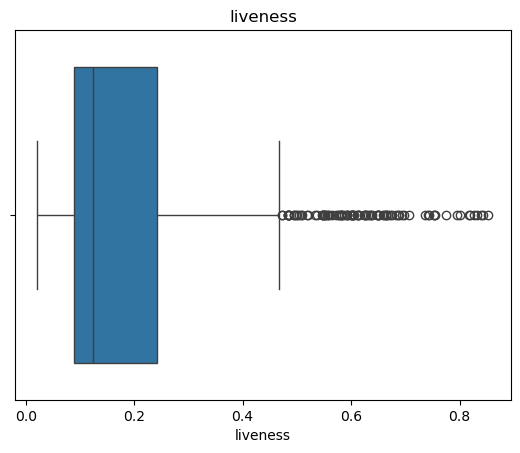

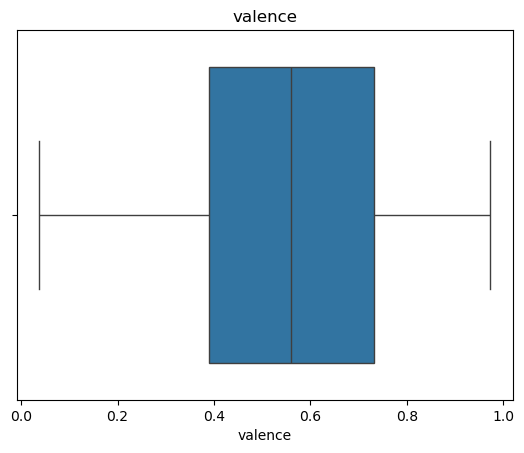

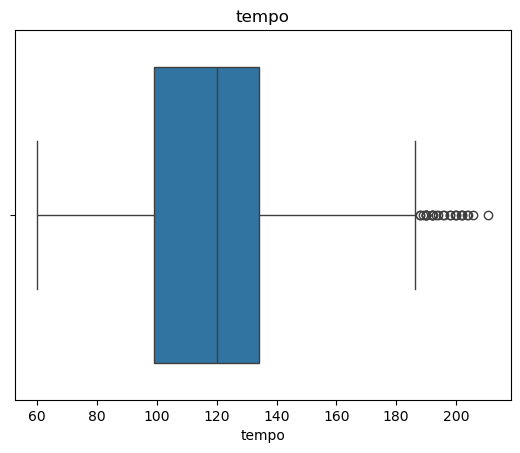

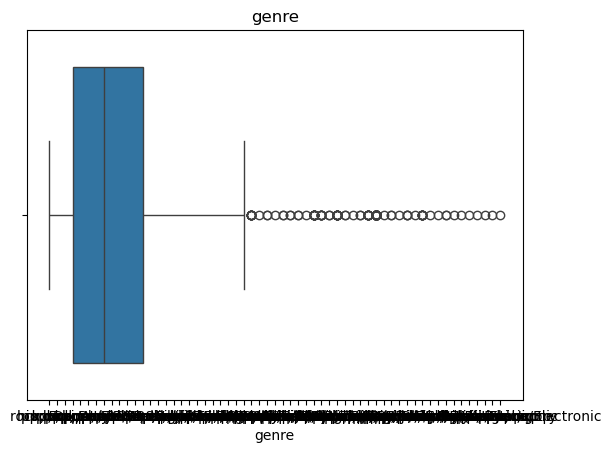

In [32]:
outliers(df)

In [45]:
def IQR(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    LF = q1-(1.5*iqr)
    UF = q3+(1.5*iqr)
    print("UF -->", UF)
    print("LF-->", LF)

In [46]:
IQR(df["duration_ms"])

UF --> 314606.0
LF--> 136846.0


In [47]:
df["duration_ms"]=np.where(df["duration_ms"]>314606,314606,df["duration_ms"])
df["duration_ms"]=np.where(df["duration_ms"]< 136846, 136846,df["duration_ms"])

In [48]:
IQR(df["popularity"])

UF --> 98.5
LF--> 30.5


In [49]:
df["popularity"]=np.where(df["popularity"]<30.5,30.5,df["popularity"])

In [50]:
IQR(df["danceability"])

UF --> 1.0410000000000001
LF--> 0.3049999999999999


In [51]:
df["danceability"]=np.where(df["danceability"]<0.30,0.30,df["danceability"])

In [52]:
IQR(df["energy"])

UF --> 1.164
LF--> 0.30000000000000004


In [86]:
df["energy"]=np.where(df["energy"]<0.3000,0.3000,df["energy"])

In [54]:
IQR(df['loudness'])

UF --> -0.685
LF--> -9.973


In [75]:
df["loudness"]=np.where(df["loudness"]<-9.973,-9.973,df["loudness"])
df["loudness"]=np.where(df["loudness"]>-0.685,-0.685,df["loudness"])

In [66]:
IQR(df["speechiness"])

UF --> 0.26295
LF--> -0.09425000000000001


In [76]:
df['speechiness']=np.where(df["speechiness"]>0.26295,0.26295,df["speechiness"])

In [58]:
IQR(df["acousticness"])

UF --> 0.41974999999999996
LF--> -0.23024999999999995


In [59]:
df["acousticness"]=np.where(df["acousticness"]>0.41,0.41,df["acousticness"])

In [60]:
IQR(df["instrumentalness"])

UF --> 0.000173
LF--> -0.0001038


In [62]:
df["instrumentalness"]=np.where(df["instrumentalness"]>0.0001,0.0001,df["loudness"])

In [63]:
IQR(df["liveness"])

UF --> 0.4724
LF--> -0.142


In [64]:
df["liveness"]=np.where(df["liveness"]>0.47,0.47,df["liveness"])

In [68]:
IQR(df['tempo'])

UF --> 187.01850000000002
LF--> 46.16649999999999


In [69]:
df["tempo"]=np.where(df["tempo"]>187.01,187.01,df["tempo"])

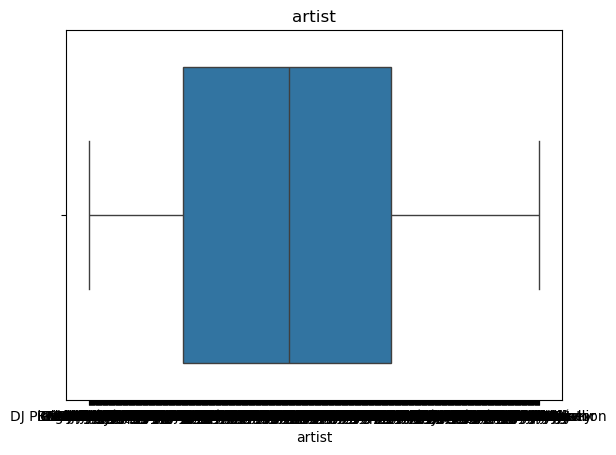

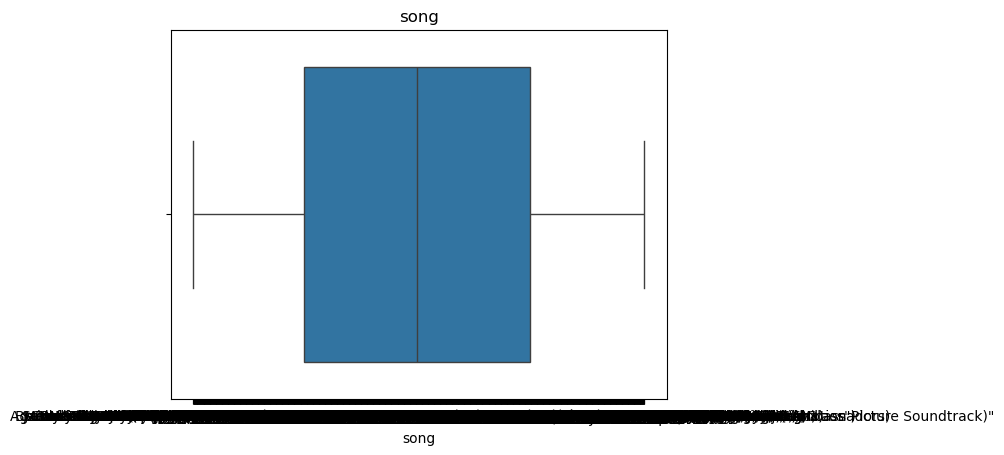

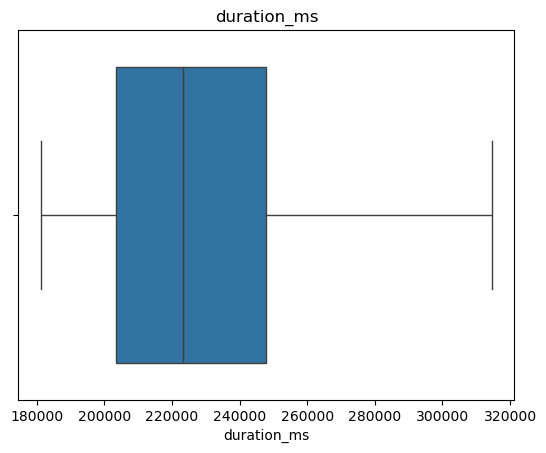

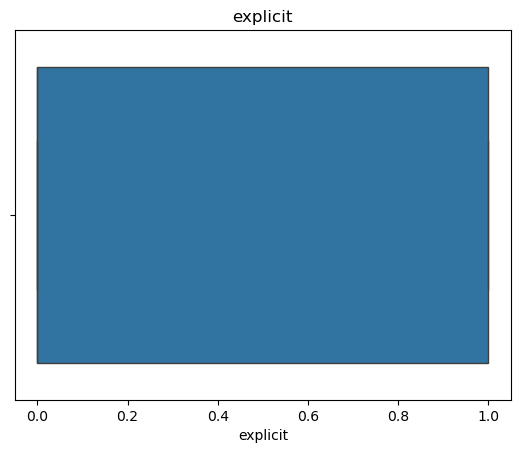

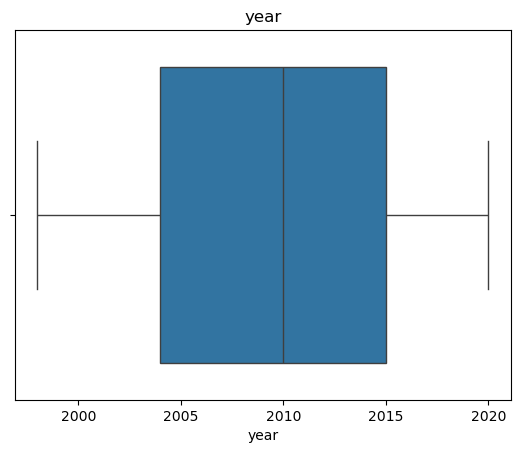

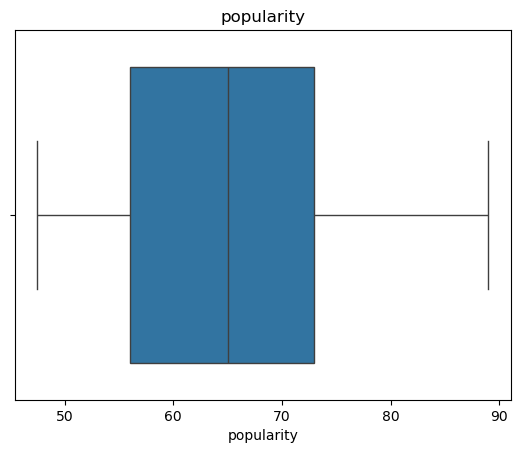

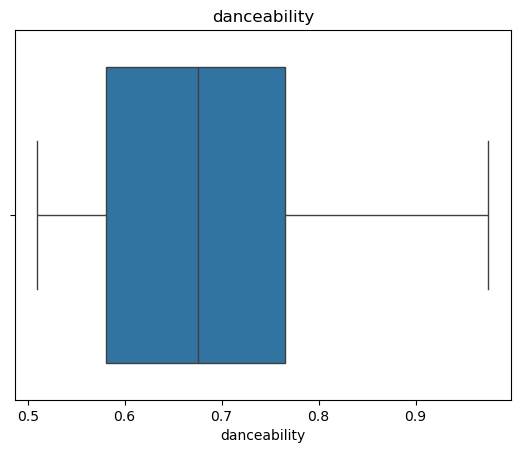

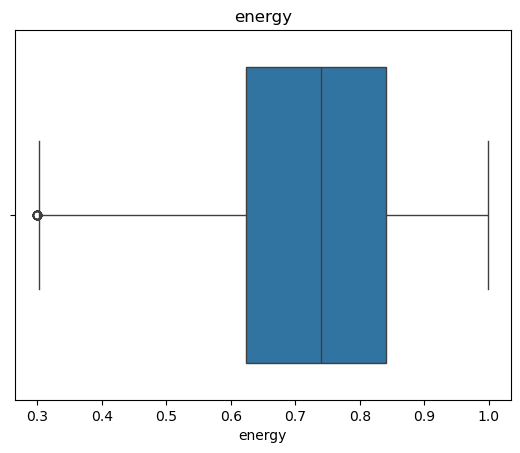

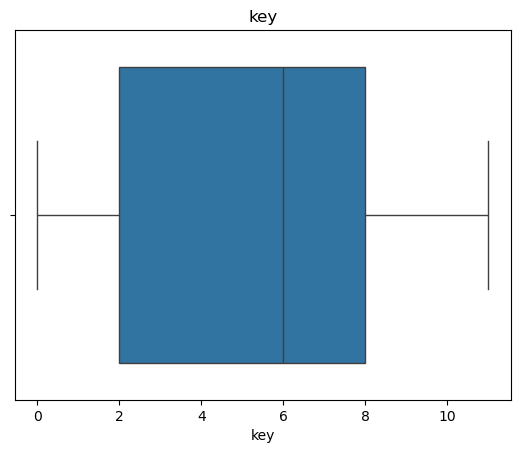

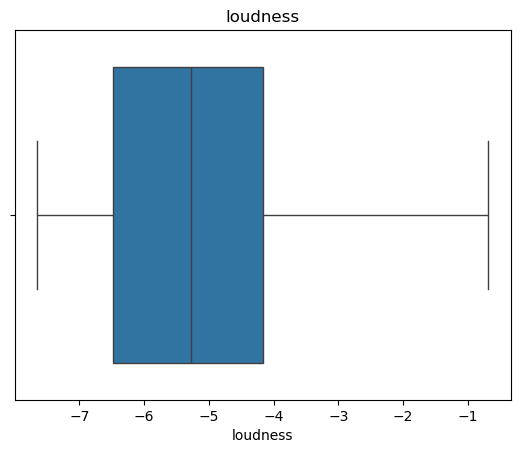

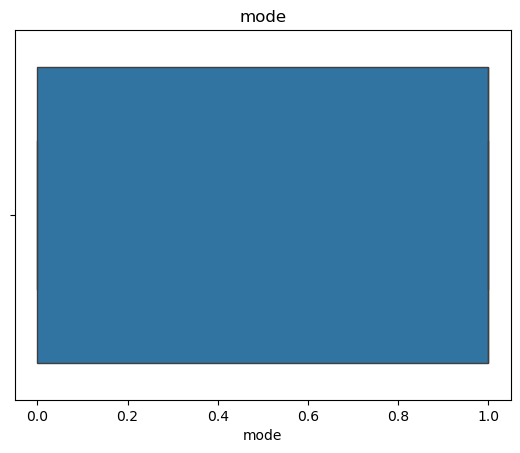

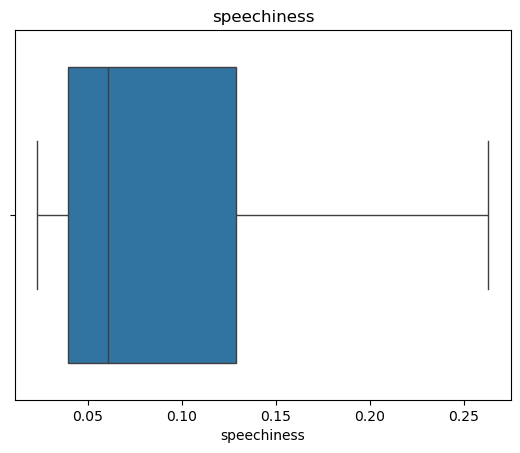

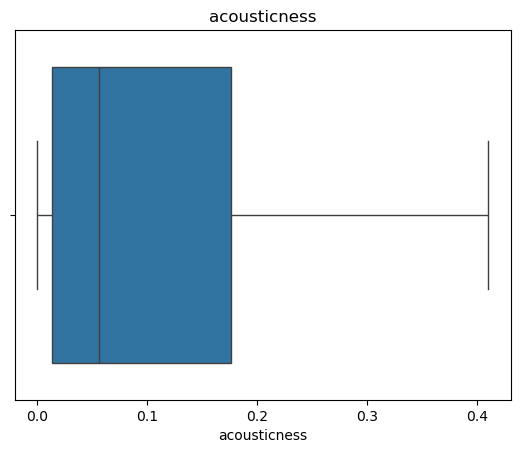

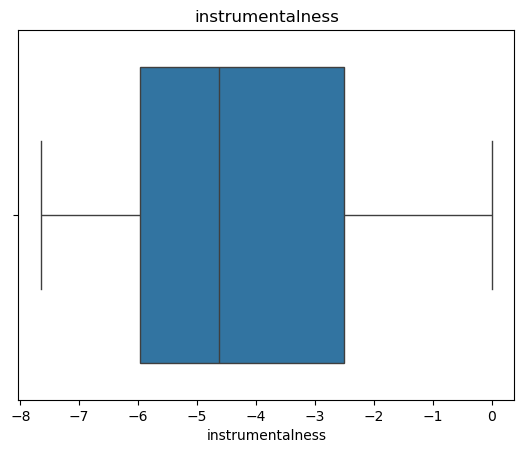

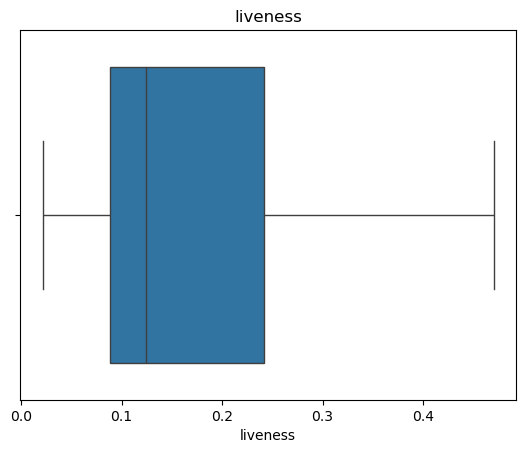

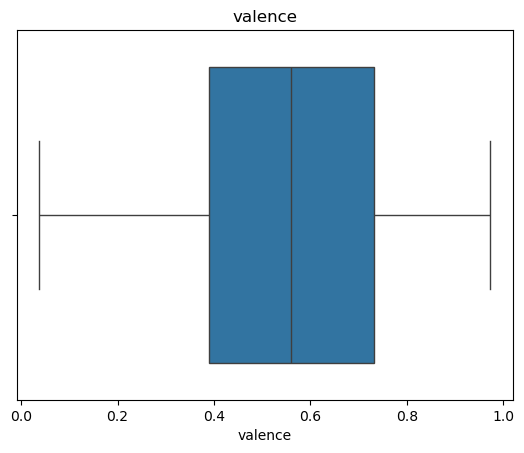

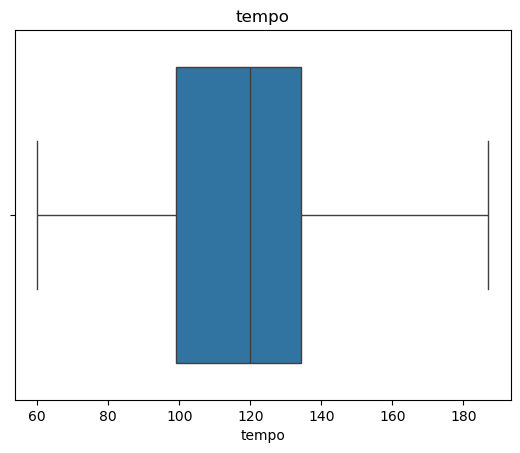

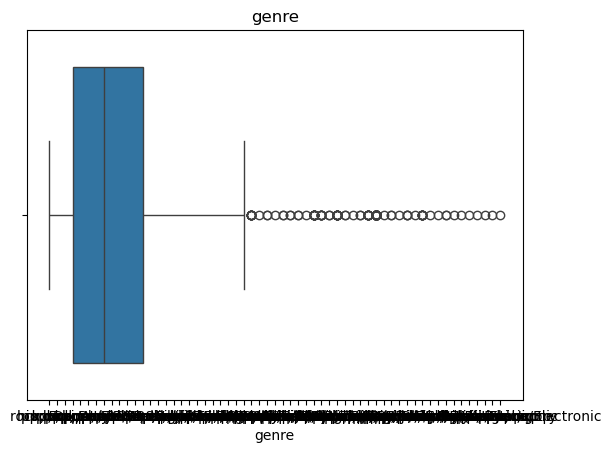

In [85]:
outliers(df)

In [81]:
df1 = pd.get_dummies(df,columns = ['genre'], drop_first = True)

In [82]:
df1

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,"genre_rock, blues","genre_rock, blues, latin","genre_rock, classical","genre_rock, easy listening","genre_rock, metal","genre_rock, pop","genre_rock, pop, Dance/Electronic","genre_rock, pop, metal","genre_rock, pop, metal, Dance/Electronic",genre_set()
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77.0,0.751,0.834,1,-5.444,...,False,False,False,False,False,False,False,False,False,False
1,blink-182,All The Small Things,181286,False,1999,79.0,0.510,0.897,0,-4.918,...,False,False,False,False,False,True,False,False,False,False
2,Faith Hill,Breathe,250546,False,1999,66.0,0.529,0.496,7,-7.650,...,False,False,False,False,False,False,False,False,False,False
3,Bon Jovi,It's My Life,224493,False,2000,78.0,0.551,0.913,0,-4.063,...,False,False,False,False,True,False,False,False,False,False
4,*NSYNC,Bye Bye Bye,200560,False,2000,65.0,0.614,0.928,8,-4.806,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181286,False,2019,79.0,0.842,0.734,1,-5.065,...,False,False,False,False,False,False,False,False,False,False
1996,Taylor Swift,Cruel Summer,181286,False,2019,78.0,0.552,0.702,9,-5.707,...,False,False,False,False,False,False,False,False,False,False
1997,Blanco Brown,The Git Up,200593,False,2019,69.0,0.847,0.678,9,-7.650,...,False,False,False,False,False,False,False,False,False,False
1998,Sam Smith,Dancing With A Stranger (with Normani),181286,False,2019,75.0,0.741,0.520,8,-7.513,...,False,False,False,False,False,False,False,False,False,False


In [103]:
x = df1.drop(columns = ['popularity','artist','song'])
y = df1["popularity"]

In [181]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state =100)

In [182]:
print(x_train.shape)
print(y_train.shape)

(1746, 72)
(1746,)


In [189]:
rn= RandomForestRegressor(n_estimators =150 , random_state =88)

In [190]:
rn.fit(x_train,y_train)

RandomForestRegressor(n_estimators=150, random_state=88)

In [191]:
print(rn.score(x_test,y_test))
print(rn.score(x_train,y_train))

0.15095947859082204
0.8702710328229017


In [148]:
t = pd.DataFrame(x_test)

In [149]:
t

,duration_ms,explicit,year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,"genre_rock, blues","genre_rock, blues, latin","genre_rock, classical","genre_rock, easy listening","genre_rock, metal","genre_rock, pop","genre_rock, pop, Dance/Electronic","genre_rock, pop, metal","genre_rock, pop, metal, Dance/Electronic",genre_set()
774,255413,True,2007,0.510,0.708,4,-5.926,0,0.1260,0.04190,...,False,False,False,False,False,False,False,False,False,False
399,214733,False,2003,0.641,0.445,6,-7.650,1,0.0368,0.14500,...,False,False,False,False,False,False,False,False,False,False
906,238506,False,2009,0.849,0.599,6,-7.650,1,0.2270,0.00301,...,False,False,False,False,False,False,False,False,False,False
1084,253906,True,2009,0.637,0.690,9,-3.214,0,0.0693,0.41000,...,False,False,False,False,False,False,False,False,False,False
901,237200,False,2008,0.851,0.806,4,-4.620,1,0.0787,0.11800,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,188693,False,2012,0.661,0.746,4,-5.153,1,0.0420,0.10900,...,False,False,False,False,False,False,False,False,False,True
1964,266086,False,2019,0.795,0.783,5,-4.271,1,0.0432,0.36100,...,False,False,False,False,False,False,False,False,False,False
1674,196613,False,2016,0.742,0.819,1,-5.307,1,0.0487,0.37200,...,False,False,False,False,False,False,False,False,False,False
1531,181286,False,2015,0.746,0.877,9,-3.782,0,0.0666,0.03750,...,False,False,False,False,False,False,False,False,False,False


In [151]:
t["popu"] = rn.predict(t)

In [152]:
t

,duration_ms,explicit,year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,"genre_rock, blues, latin","genre_rock, classical","genre_rock, easy listening","genre_rock, metal","genre_rock, pop","genre_rock, pop, Dance/Electronic","genre_rock, pop, metal","genre_rock, pop, metal, Dance/Electronic",genre_set(),popu
774,255413,True,2007,0.510,0.708,4,-5.926,0,0.1260,0.04190,...,False,False,False,False,False,False,False,False,False,64.575
399,214733,False,2003,0.641,0.445,6,-7.650,1,0.0368,0.14500,...,False,False,False,False,False,False,False,False,False,58.485
906,238506,False,2009,0.849,0.599,6,-7.650,1,0.2270,0.00301,...,False,False,False,False,False,False,False,False,False,62.855
1084,253906,True,2009,0.637,0.690,9,-3.214,0,0.0693,0.41000,...,False,False,False,False,False,False,False,False,False,66.560
901,237200,False,2008,0.851,0.806,4,-4.620,1,0.0787,0.11800,...,False,False,False,False,False,False,False,False,False,66.545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,188693,False,2012,0.661,0.746,4,-5.153,1,0.0420,0.10900,...,False,False,False,False,False,False,False,False,True,63.535
1964,266086,False,2019,0.795,0.783,5,-4.271,1,0.0432,0.36100,...,False,False,False,False,False,False,False,False,False,62.045
1674,196613,False,2016,0.742,0.819,1,-5.307,1,0.0487,0.37200,...,False,False,False,False,False,False,False,False,False,61.095
1531,181286,False,2015,0.746,0.877,9,-3.782,0,0.0666,0.03750,...,False,False,False,False,False,False,False,False,False,65.650
